# Astropy.Modelling

In [2]:
pip install --pre astroquery

    100% |████████████████████████████████| 4.5MB 2.1MB/s eta 0:00:01
  Stored in directory: /home/pranav/.cache/pip/wheels/27/60/eb/678794ad1072bd63df6d9789e75937f07afeea75fa1d26c8e6
Successfully built astroquery
Note: you may need to restart the kernel to use updated packages.


In [3]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.modeling import models, fitting
from astroquery.vizier import Vizier
import scipy.optimize
# Make plots display in notebooks
%matplotlib inline

# 1) Fit a Linear model: Three steps to fit data using astropy.modeling

We are going to start with a linear fit to real data. The data comes from the paper Bhardwaj et al. 2017. This is a catalog of Type II Cepheids, which is a type of variable stars that pulsate with a period between 1 and 50 days. In this part of the tutorial, we are going to measure the Cepheids Period-Luminosity relation using astropy.modeling. This relation states that if a star has a longer period, the luminosity we measure is higher.

To get it, we are going to import it from Vizier using astroquery.

In [4]:
catalog = Vizier.get_catalogs('J/A+A/605/A100')

This catalog has a lot of information, but for this tutorial we are going to work only with periods and magnitudes. Let’s grab them using the keywords 'Period' and __Ksmag__. Note that 'e__Ksmag_' refers to the error bars in the magnitude measurements.

In [6]:
period = np.array(catalog[0]['Period'])
log_period = np.log10(period)
k_mag = np.array(catalog[0]['__Ksmag_'])
k_mag_err = np.array(catalog[0]['e__Ksmag_'])

Text(0, 0.5, 'Ks')

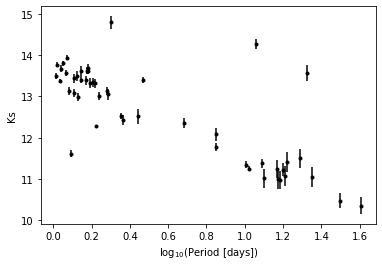

In [7]:
plt.errorbar(log_period, k_mag, k_mag_err, fmt='k.')
plt.xlabel(r'$\log_{10}$(Period [days])')
plt.ylabel('Ks')

One could say that there is a linear relationship between log period and magnitudes. To probe it, we want to make a fit to the data. This is where astropy.modeling is useful. We are going to understand how in three simple lines we can make any fit we want. We are going to start with the linear fit, but first, let’s understand what a model and a fitter are.

## Models in Astropy
Models in Astropy are known parametrized functions. With this format they are easy to define and to use, given that we do not need to write the function expression every time we want to use a model, just the name. They can be linear or non-linear in the variables. Some examples of models are:

Gaussian1D

Trapezoid1D

Polynomial1D

Sine1D

Linear1D

The list continues.

## Fitters in Astropy
Fitters in Astropy are the classes resposable for making the fit. They can be linear or non-linear in the parameters (no the variable, like models). Some examples are:

LevMarLSQFitter() Levenberg-Marquardt algorithm and least squares statistic.

LinearLSQFitter() A class performing a linear least square fitting.

SLSQPLSQFitter() SLSQP optimization algorithm and least squares statistic.

SimplexLSQFitter() Simplex algorithm and least squares statistic.

More detailles here

Now we continue with our fitting.

## Step 1: Model
First we need to choose which model we are going to use to fit to our data. As we said before, our data looks like a linear relation, so we are going to use a linear model.

In [8]:
model = models.Linear1D()